In [161]:
import os
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
from sklearn import metrics

%matplotlib inline

sns.set(font_scale=1.2)
sns.set_style("white")

In [162]:
# define column names
# cpu_col = 'CPU time [%]'
cpu_col = 'Resource req. [e.g., CPU %]'
# thr_col = 'Max. throughput [Gbit/s]'
thr_col = 'Traffic load [e.g., Mbit/s]'

In [169]:
# generate synthetic data
def gen_benchmark(cpu, coeff1=1, coeff2=1):
    """Generate max throughput for given CPU time according to log function"""
    return coeff1 * math.log2(1 + coeff2 * cpu)

def synthetic_benchmark():
    """Generate synthetic benchmark results for CPU time 0-100%"""
    cpu_list = np.arange(10, 100, 1)
    data = []
    for cpu in cpu_list:
        data.append([cpu, gen_benchmark(cpu, coeff2=100)])
    return pd.DataFrame(data, columns=[cpu_col, thr_col])

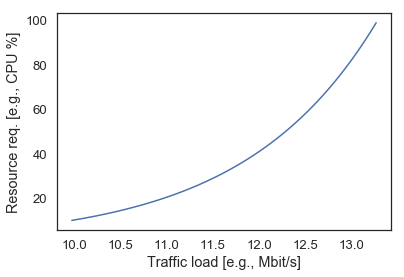

In [170]:
df = synthetic_benchmark()
# sns.lineplot(df[cpu_col], df[thr_col])
sns.lineplot(df[thr_col], df[cpu_col])

In [171]:
# process data
# no need for validation or test split in this simple example
X = df[[thr_col]]
y = df[cpu_col]
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X_scaled = scaler.transform(X)

In [172]:
# train linear model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# predict
lin_col = 'Linear'
df[lin_col] = lin_reg.predict(X)

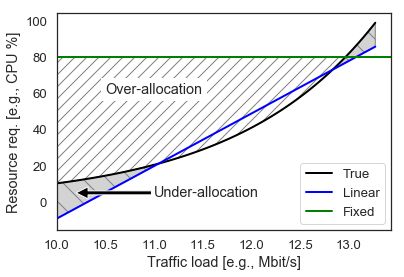

In [187]:
# plotting
fig, ax = plt.subplots()

fixed = 80

# lines
plt.plot(df[thr_col], df[cpu_col], label='True', color='black', linewidth=2)
plt.plot(df[thr_col], df[lin_col], color='blue', linewidth=2)
plt.axhline(y=fixed, label='Fixed', color='green', linewidth=2)

# fill in between
ax.fill_between(df[thr_col], df[cpu_col], fixed, where=df[cpu_col]<fixed, facecolor='white', edgecolor='grey', hatch='//')
ax.fill_between(df[thr_col], df[lin_col], df[cpu_col], where=df[lin_col]<df[cpu_col], facecolor='lightgrey', edgecolor='grey', hatch='\\')

# # text
ax.text(10.5, 60, 'Over-allocation', bbox={'facecolor': 'white'})
ax.annotate('Under-allocation', xy=(10.2, 5), xytext=(11, 5), arrowprops={'facecolor': 'black'}, verticalalignment='center')

plt.xlabel(thr_col)
plt.ylabel(cpu_col)
plt.xlim(10)
#plt.ylim(0, 1)
plt.legend()

fig.savefig('plots/example_alloc.pdf', bbox_inches='tight')